## Changing diffusivity configuration

Using the same external forcing as in CNTDIFF/run03, I modified the vertical diffusivity configuration in 7 runs (CNTDIFF/ run11,12,17 and 3DDIFF 04,04,05,07).

In [2]:
import numpy as np

import matplotlib.pyplot as plt

from math import *

%matplotlib inline

from netCDF4 import Dataset

import seaborn as sns

import canyon_tools.readout_tools as rdout

import canyon_tools.metrics_tools as mpt


In [3]:
# load grid variables
Grid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
GridOut = Dataset(Grid)
GridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
GridNoCOut = Dataset(GridNoC)
State03 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
State11 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/stateGlob.nc'
State12 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/stateGlob.nc'
State17 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/stateGlob.nc'
State3D04 =  '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/stateGlob.nc'
State3D05 =  '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/stateGlob.nc'
State3D06 =  '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/stateGlob.nc'
State3D07 =  '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/stateGlob.nc'

StateOut =   Dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc')

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rdout.getField(Grid, 'XC') # x coords tracer cells
yc = rdout.getField(Grid, 'YC') # y coords tracer cells
rc = GridOut.variables['RC']
z = StateOut.variables['Z']
times = StateOut.variables['T']

bathy = rdout.getField(Grid, 'Depth')

hFacC = rdout.getField(Grid, 'HFacC')
MaskC = rdout.getMask(Grid, 'HFacC')

rA = rdout.getField(GridNoC, 'rA') 
drF = GridNoCOut.variables['drF'] # vertical distance between faces
drC = GridNoCOut.variables['drC'] # vertical distance between centers
dxf = GridNoCOut.variables['dxF']

hFacCNoC = rdout.getField(GridNoC, 'HFacC')
mask_NoC = rdout.getMask(GridNoC, 'HFacC')


### Along shore velocity

In [3]:
# get u and v components of velocity
Ustag = rdout.getField(State03,'U')
Vstag = rdout.getField(State03,'V')
UU03, VV03 = rdout.unstagger(Ustag,Vstag)

In [4]:
Ustag = rdout.getField(State11,'U')
Vstag = rdout.getField(State11,'V')
UU11, VV11 = rdout.unstagger(Ustag,Vstag)

Ustag = rdout.getField(State12,'U')
Vstag = rdout.getField(State12,'V')
UU12, VV12 = rdout.unstagger(Ustag,Vstag)

Ustag = rdout.getField(State17,'U')
Vstag = rdout.getField(State17,'V')
UU17, VV17 = rdout.unstagger(Ustag,Vstag)

In [5]:
Ustag = rdout.getField(State3D04,'U')
Vstag = rdout.getField(State3D04,'V')
UU3D04, VV3D04 = rdout.unstagger(Ustag,Vstag)

Ustag = rdout.getField(State3D05,'U')
Vstag = rdout.getField(State3D05,'V')
UU3D05, VV3D05 = rdout.unstagger(Ustag,Vstag)

Ustag = rdout.getField(State3D06,'U')
Vstag = rdout.getField(State3D06,'V')
UU3D06, VV3D06 = rdout.unstagger(Ustag,Vstag)

Ustag = rdout.getField(State3D07,'U')
Vstag = rdout.getField(State3D07,'V')
UU3D07, VV3D07 = rdout.unstagger(Ustag,Vstag)

In [6]:
def plotU_timeseries(UU,times,kk,ii):
    '''
    '''
    sns.set_context('talk')
    sns.set_style('white')

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

    ax1.plot(times[:]/86400.0,UU[:,kk,10,ii], 'r', label = ('CS pos = %1.1f km' %(yc[10,ii]/1000.0)))
    ax1.plot(times[:]/86400.0,UU[:,kk,180,ii], 'b', label = ('CS pos = %1.1f km' %(yc[180,ii]/1000.0)))
    ax1.plot(times[:]/86400.0,UU[:,kk,227,ii], 'purple', label = ('CS pos = %1.1f km' %(yc[227,ii]/1000.0)))
    ax1.plot(times[:]/86400.0,UU[:,kk,267,ii], 'orange', label = ('CS pos = %1.1f km' %(yc[267,ii]/1000.0)))
    ax1.plot(times[:]/86400.0,UU[:,kk,350,ii], 'g', label = ('CS pos = %1.1f km' %(yc[350,ii]/1000.0)))

    ax1.legend(loc = 0)
    ax1.set_ylabel('Alongshore velocity (m/s)')
    ax1.set_xlabel('time (days)')
    ax1.set_title('at z = %1.1f m' %z[kk])

    cntr = ax2.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,750,900,1050], colors = '0.4')
    ax2.clabel(cntr)
    ax2.plot(xc[10,ii]/1000.0,yc[10,ii]/1000.0,'ro',markersize = 14)
    ax2.plot(xc[180,ii]/1000.0,yc[180,ii]/1000.0,'bo',markersize = 14)
    ax2.plot(xc[227,ii]/1000.0,yc[227,ii]/1000.0,'o',color = 'purple',markersize = 14)
    ax2.plot(xc[267,ii]/1000.0,yc[267,ii]/1000.0,'o',color='orange',markersize = 14)
    ax2.plot(xc[350,ii]/1000.0,yc[350,ii]/1000.0,'go',markersize = 14)
    ax2.set_xlabel('(km)')
    ax2.set_ylabel('(km)')

/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


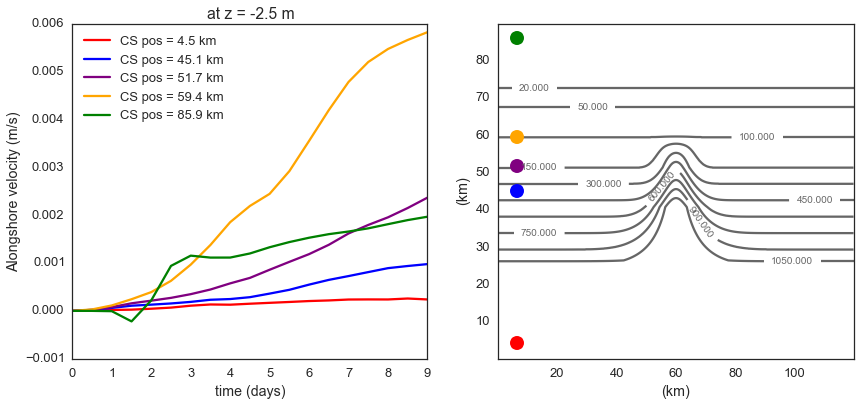

In [7]:
plotU_timeseries(UU03-UU11,times,0,10)


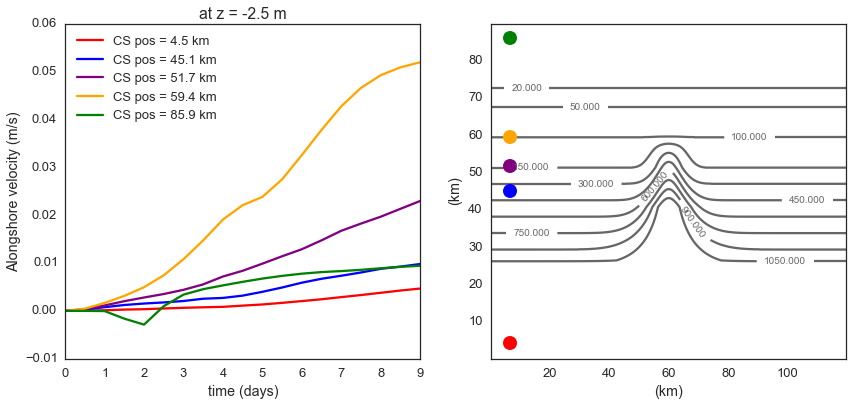

In [8]:
plotU_timeseries(UU03-UU12,times,0,10)


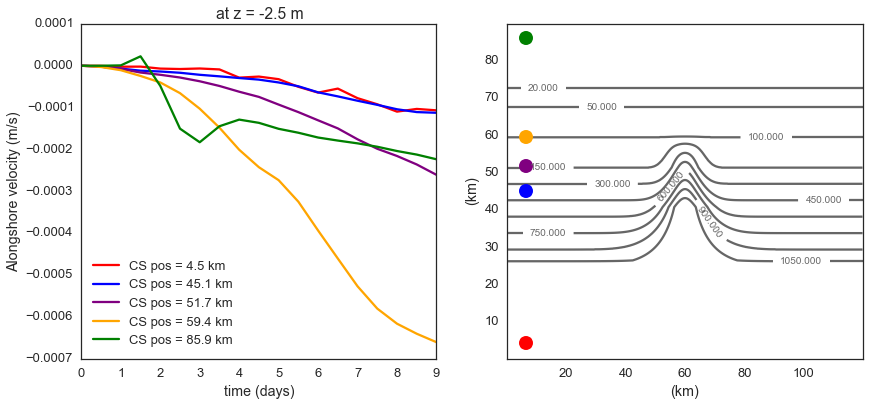

In [9]:
plotU_timeseries(UU03-UU17,times,0,10)


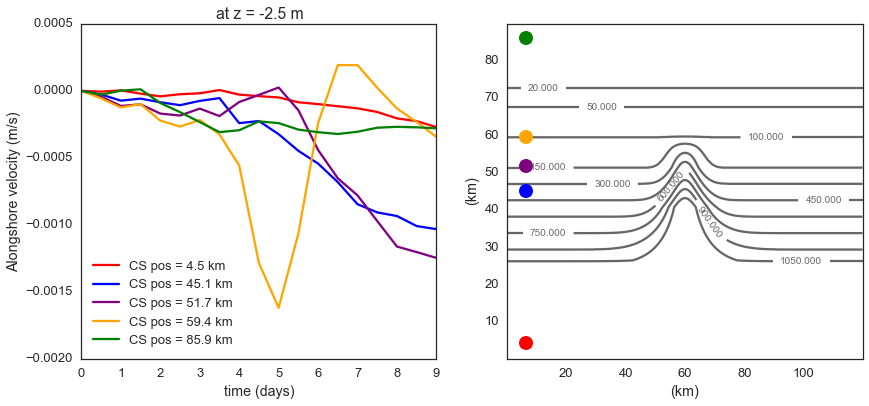

In [10]:
plotU_timeseries(UU03-UU3D04,times,0,10)

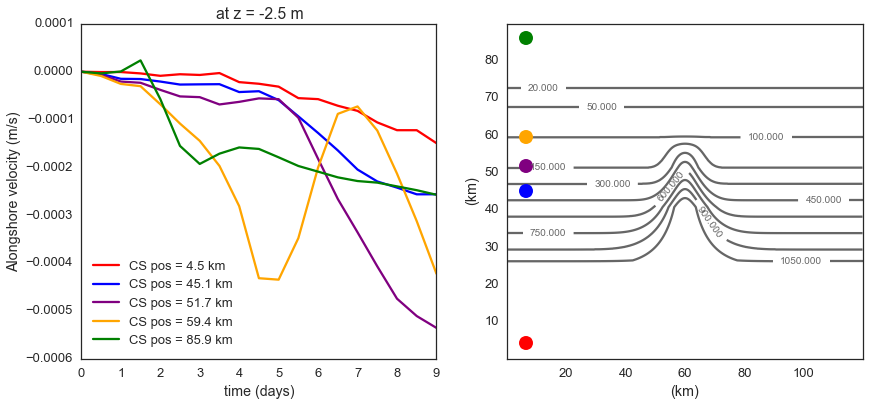

In [11]:
plotU_timeseries(UU03-UU3D05,times,0,10)

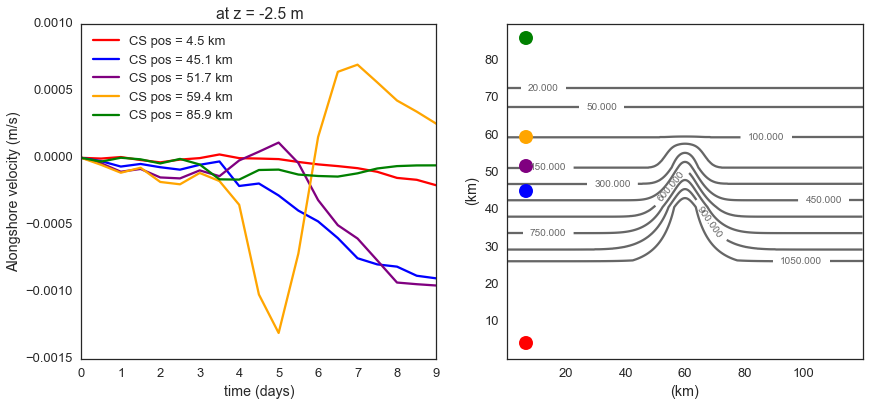

In [12]:
plotU_timeseries(UU03-UU3D06,times,0,10)

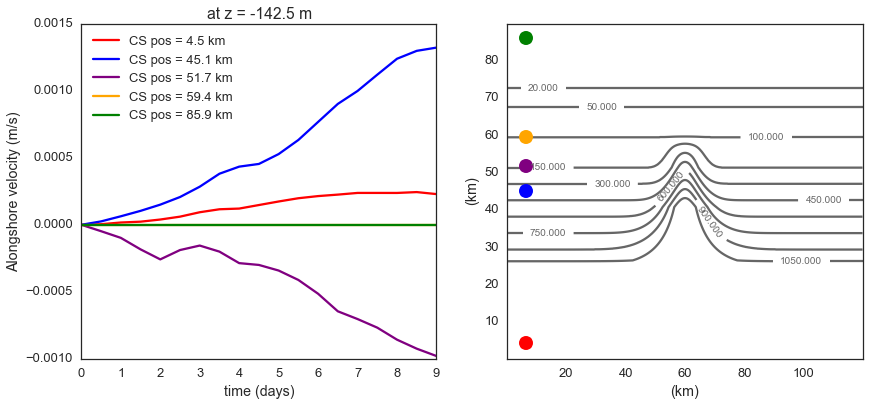

In [13]:
plotU_timeseries(UU03-UU11,times,28,10)

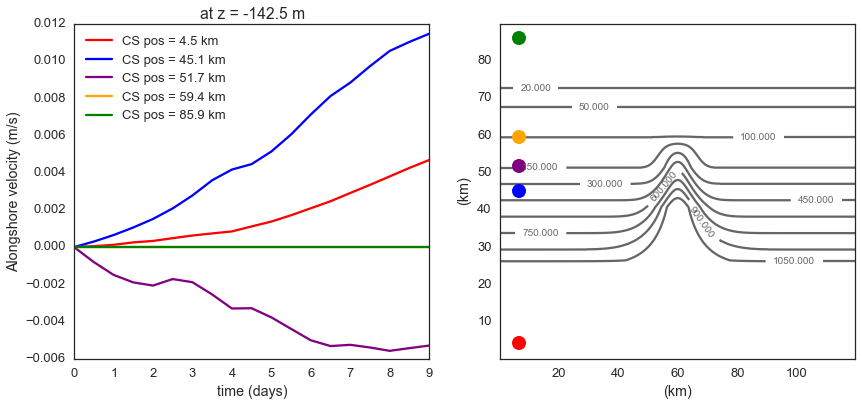

In [14]:
plotU_timeseries(UU03-UU12,times,28,10)

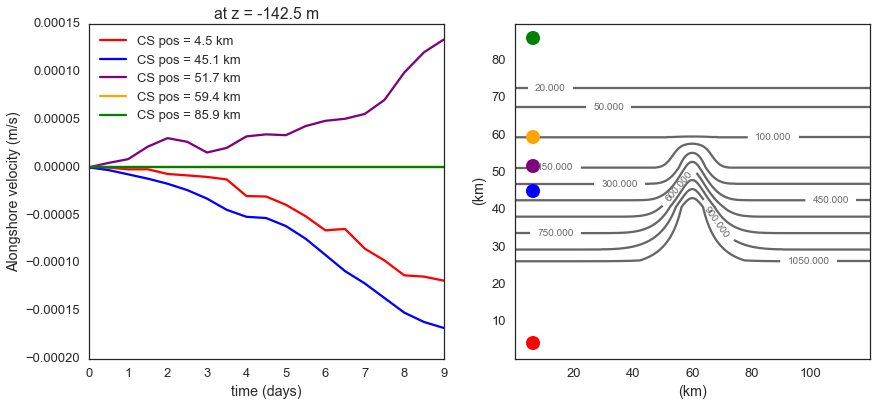

In [15]:
plotU_timeseries(UU03-UU17,times,28,10)

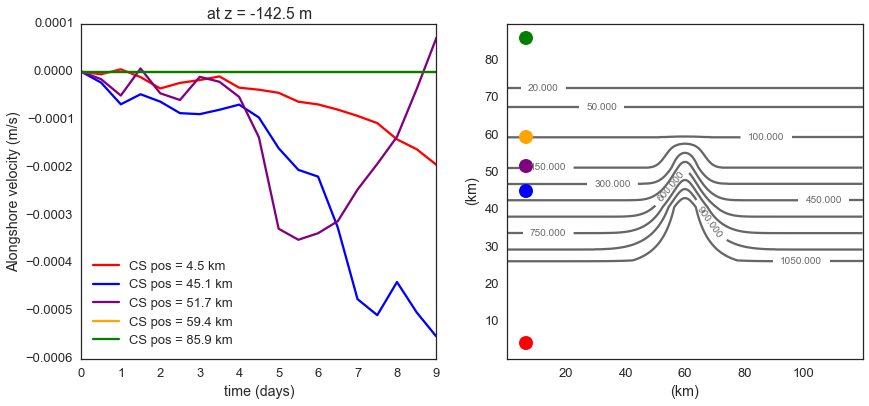

In [17]:
plotU_timeseries(UU03-UU3D04,times,28,10)

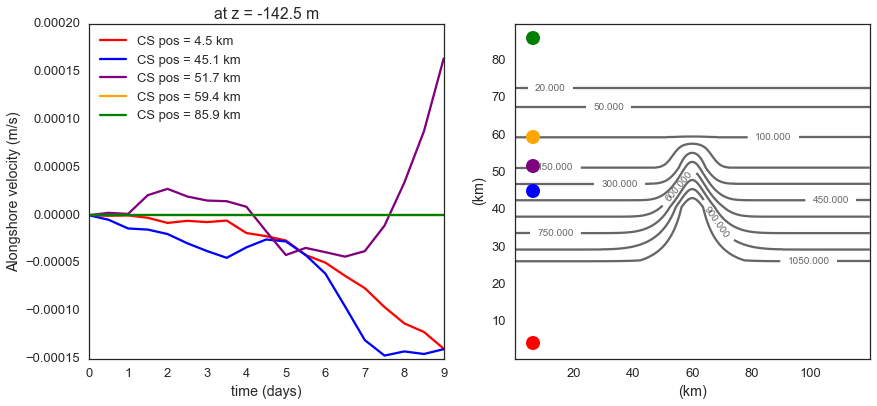

In [18]:
plotU_timeseries(UU03-UU3D05,times,28,10)

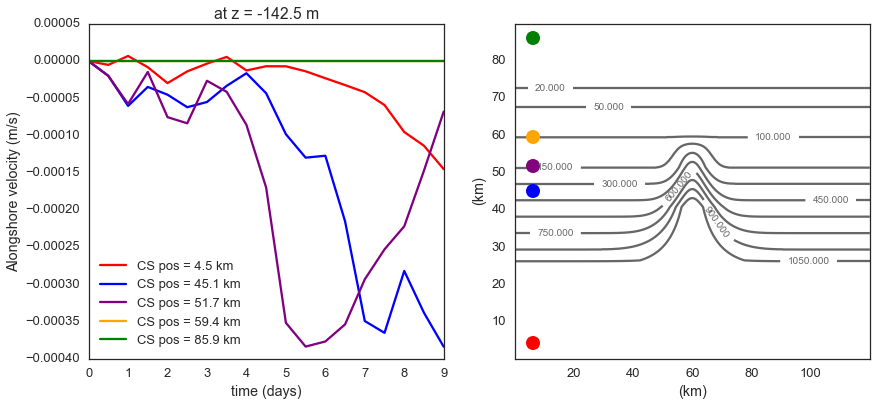

In [19]:
plotU_timeseries(UU03-UU3D06,times,28,10)

## Quick comparison of temperatures

In [20]:
Temp03 = rdout.getField(State03,'Temp')

In [21]:
Temp11 = rdout.getField(State11,'Temp')
Temp12 = rdout.getField(State12,'Temp')

In [23]:
Temp17 = rdout.getField(State17,'Temp')
Temp3D04 = rdout.getField(State3D04,'Temp')
Temp3D05 = rdout.getField(State3D05,'Temp')

In [24]:
Temp3D06 = rdout.getField(State3D06,'Temp')
Temp3D07 = rdout.getField(State3D07,'Temp')

In [25]:
MaskExp = np.expand_dims(MaskC,0)
MaskT = MaskExp + np.zeros(Temp03.shape)

In [26]:
Temp_masked03 = np.ma.masked_array(Temp03,mask = MaskT) 

In [27]:
Temp_masked11 = np.ma.masked_array(Temp11,mask = MaskT) 
Temp_masked12 = np.ma.masked_array(Temp12,mask = MaskT) 
Temp_masked17 = np.ma.masked_array(Temp17,mask = MaskT) 
Temp_masked3D04 = np.ma.masked_array(Temp3D04,mask = MaskT) 
Temp_masked3D05 = np.ma.masked_array(Temp3D05,mask = MaskT) 
Temp_masked3D06 = np.ma.masked_array(Temp3D06,mask = MaskT) 
Temp_masked3D07 = np.ma.masked_array(Temp3D07,mask = MaskT) 

In [28]:
def contourfTemp(Temp,tt1=2,tt2=4,tt3=6,tt4=8,tt5=10,tt6=12,tt7=14,tt8=16,tt9=18,tmax=17,tmin=0,colormap='rainbow'):
    '''
    '''
    sns.set_context('talk')
    sns.set_style('white')

    fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(15,10), sharex=True, sharey=True)

    cf = ax1.contourf(xc/1000.0,yc/1000.0,Temp[tt1,:,:], 20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax1.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax1.clabel(cntr)
    
    cf = ax2.contourf(xc/1000.0,yc/1000.0,Temp[tt2,:,:], 20,cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax2.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax2.clabel(cntr)
    
    cf = ax3.contourf(xc/1000.0,yc/1000.0,Temp[tt3,:,:],20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax3.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax3.clabel(cntr)
    
    cf = ax4.contourf(xc/1000.0,yc/1000.0,Temp[tt4,:,:], 20,cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax4.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax4.clabel(cntr)
    
    cf = ax5.contourf(xc/1000.0,yc/1000.0,Temp[tt5,:,:],20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax5.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax5.clabel(cntr)
    
    cf = ax6.contourf(xc/1000.0,yc/1000.0,Temp[tt6,:,:], 20,cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax6.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax6.clabel(cntr)
    
    cf = ax7.contourf(xc/1000.0,yc/1000.0,Temp[tt7,:,:],20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax7.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax7.clabel(cntr)
    
    cf = ax8.contourf(xc/1000.0,yc/1000.0,Temp[tt8,:,:], 20,cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax8.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax8.clabel(cntr)
    
    cf9 = ax9.contourf(xc/1000.0,yc/1000.0,Temp[tt9,:,:],20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax9.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax9.clabel(cntr)
    
    ax1.annotate('Day 1', xy=(1, 1), xytext=(100, 5), fontsize = 14)
    ax9.annotate('Day 9', xy=(1, 1), xytext=(100, 5), fontsize = 14)
    
    cbar_ax = fig.add_axes([0.12, -0.02, 0.8, 0.03])
    fig.colorbar(cf9, cax=cbar_ax, orientation='horizontal')
    cbar_ax.set_xlabel('Temperature ($^{\circ}C$)')
    
    ax4.set_ylabel('(km)')
    ax8.set_xlabel('(km)')
    plt.tight_layout()

## Surface

/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


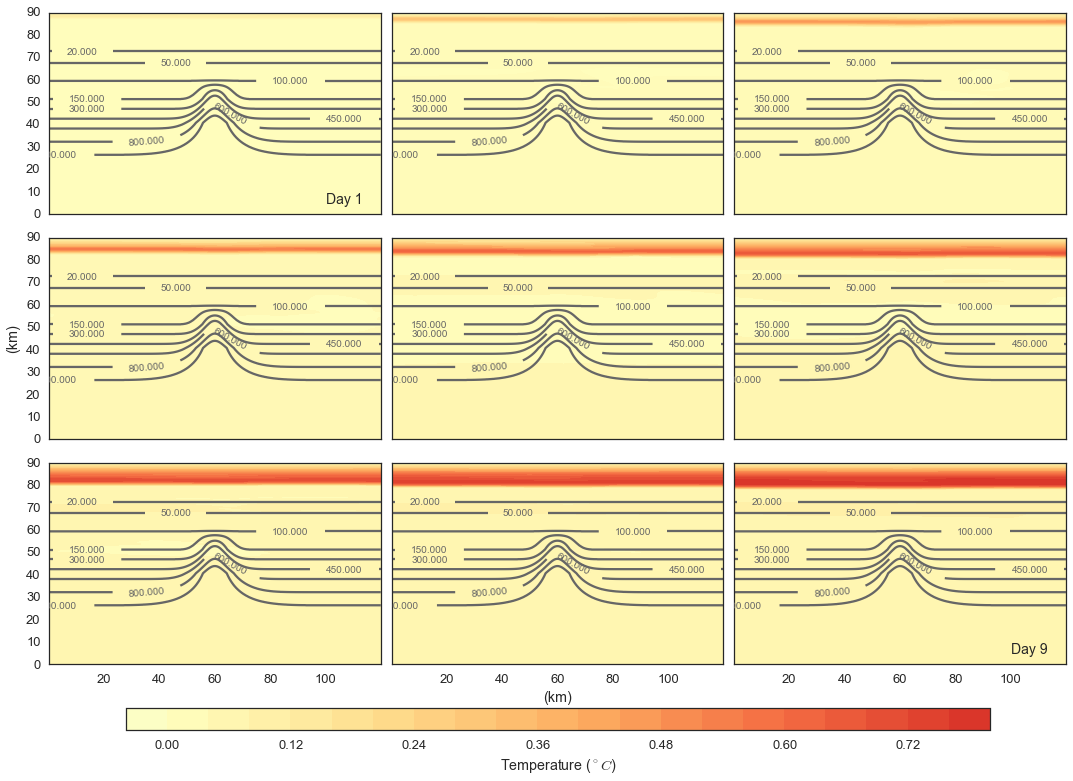

In [29]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked11[:,0,:,:],tmax=1.0,tmin=-1.0,colormap='RdYlBu_r')

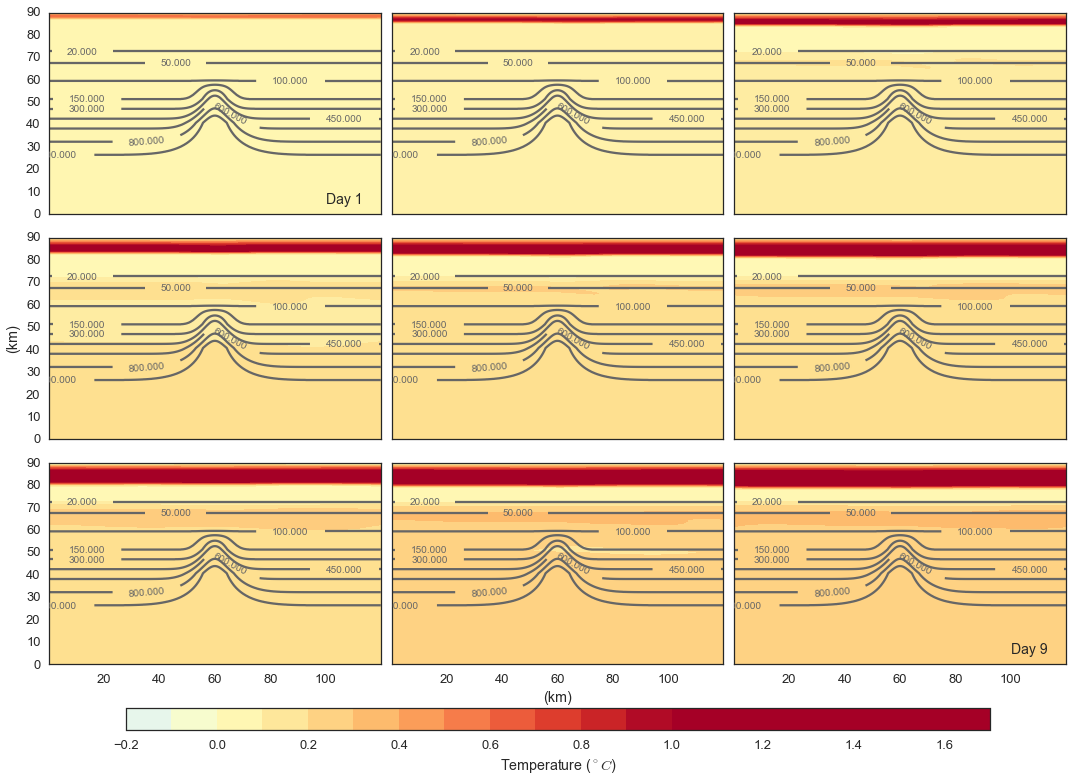

In [30]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked12[:,0,:,:],tmax=1.0,tmin=-1.0,colormap='RdYlBu_r')

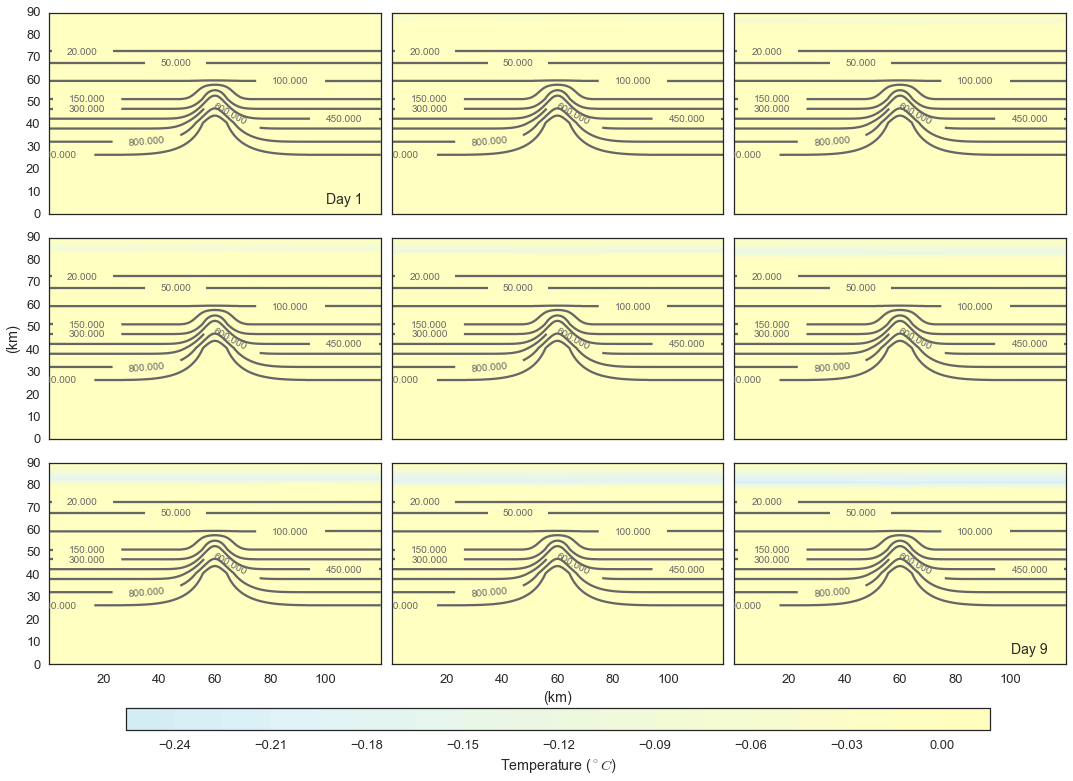

In [31]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked17[:,0,:,:],tmax=1.0,tmin=-1.0,colormap='RdYlBu_r')

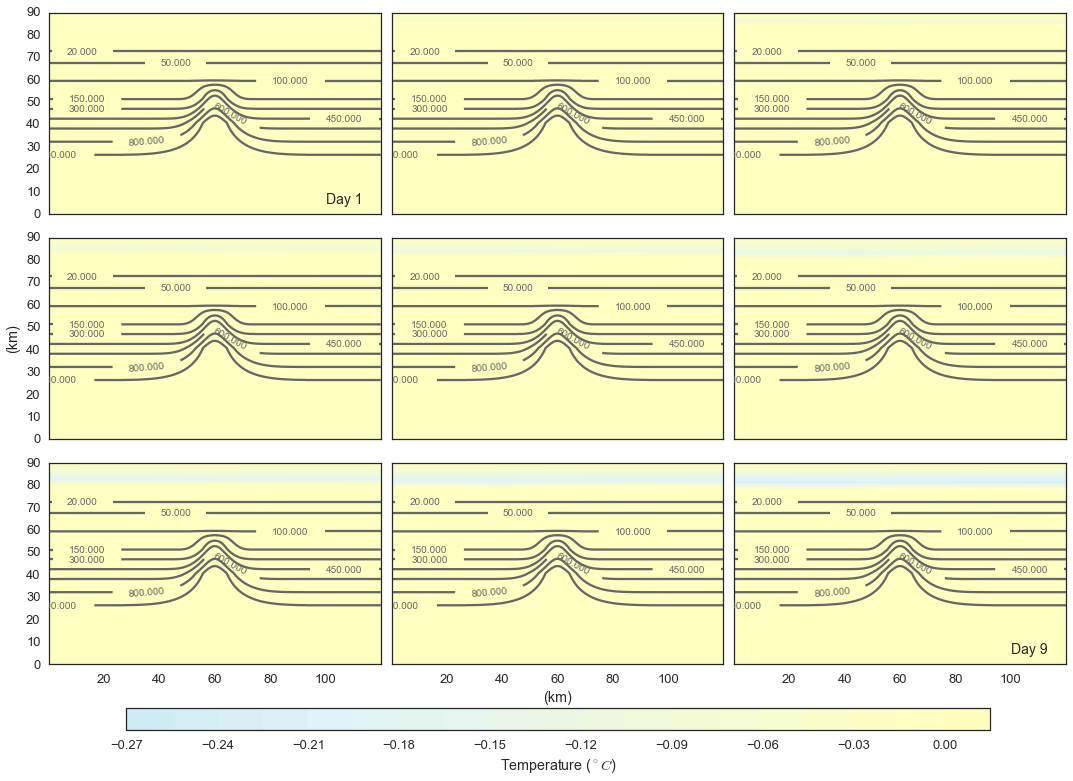

In [32]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked3D04[:,0,:,:],tmax=1.0,tmin=-1.0,colormap='RdYlBu_r')

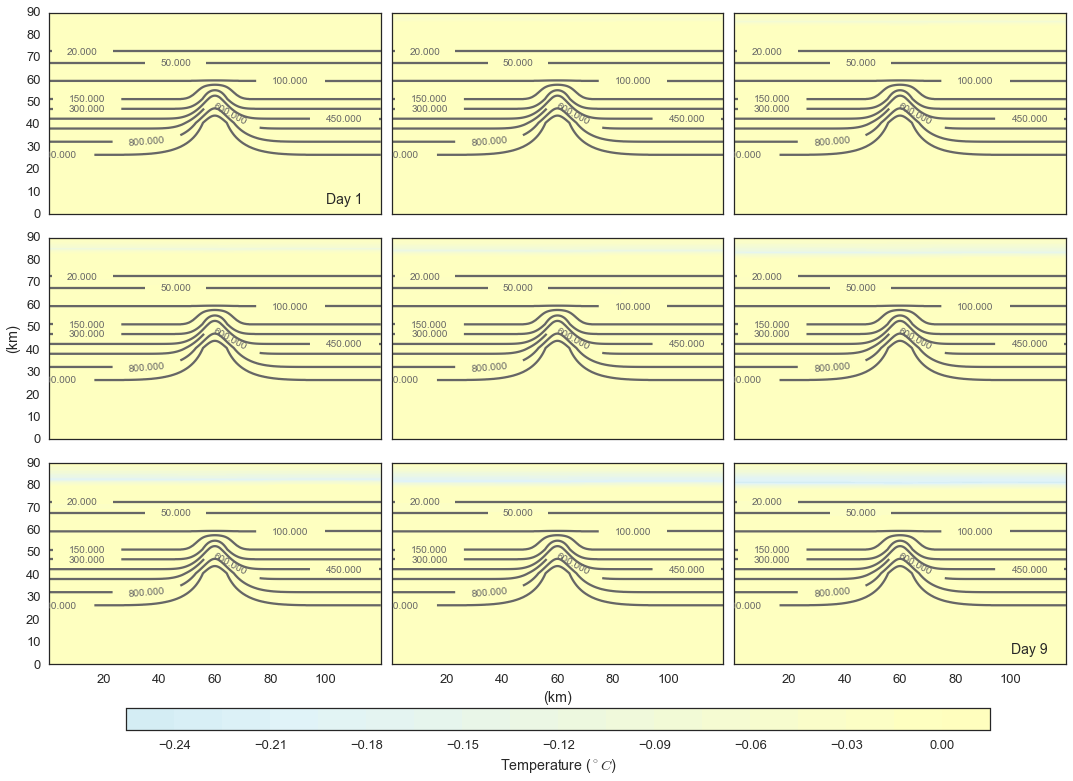

In [33]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked3D05[:,0,:,:],tmax=1.0,tmin=-1.0,colormap='RdYlBu_r')

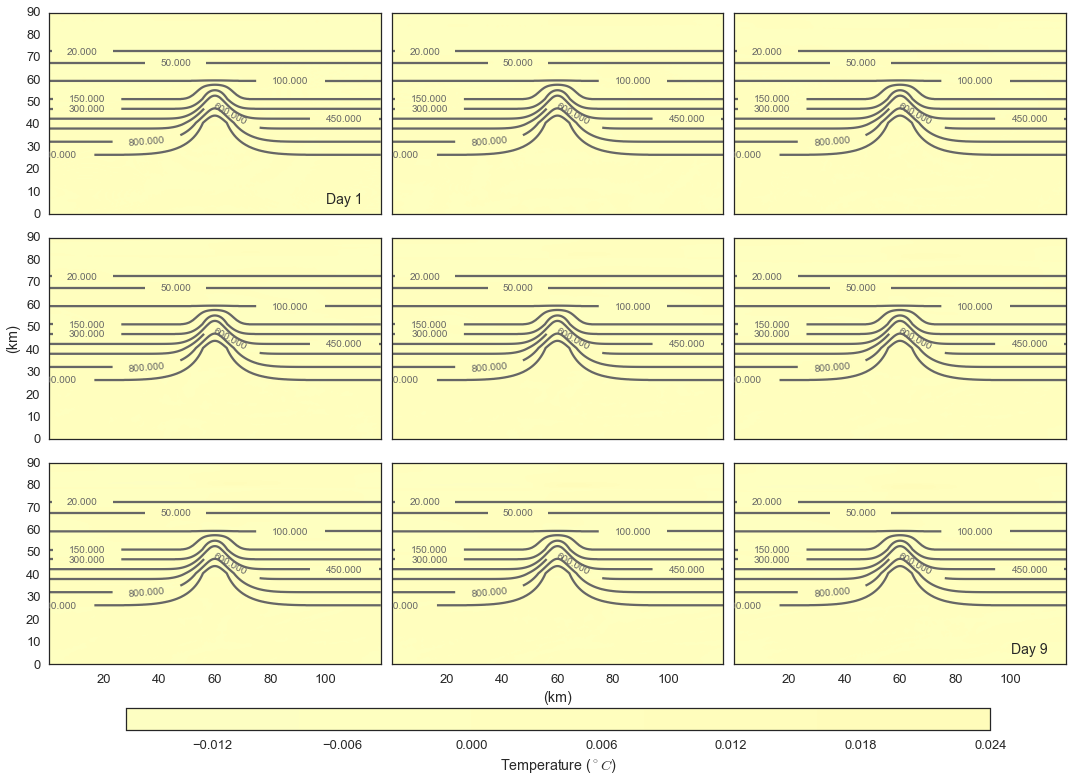

In [34]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked3D06[:,0,:,:],tmax=1.0,tmin=-1.0,colormap='RdYlBu_r')

## Shelf break depth

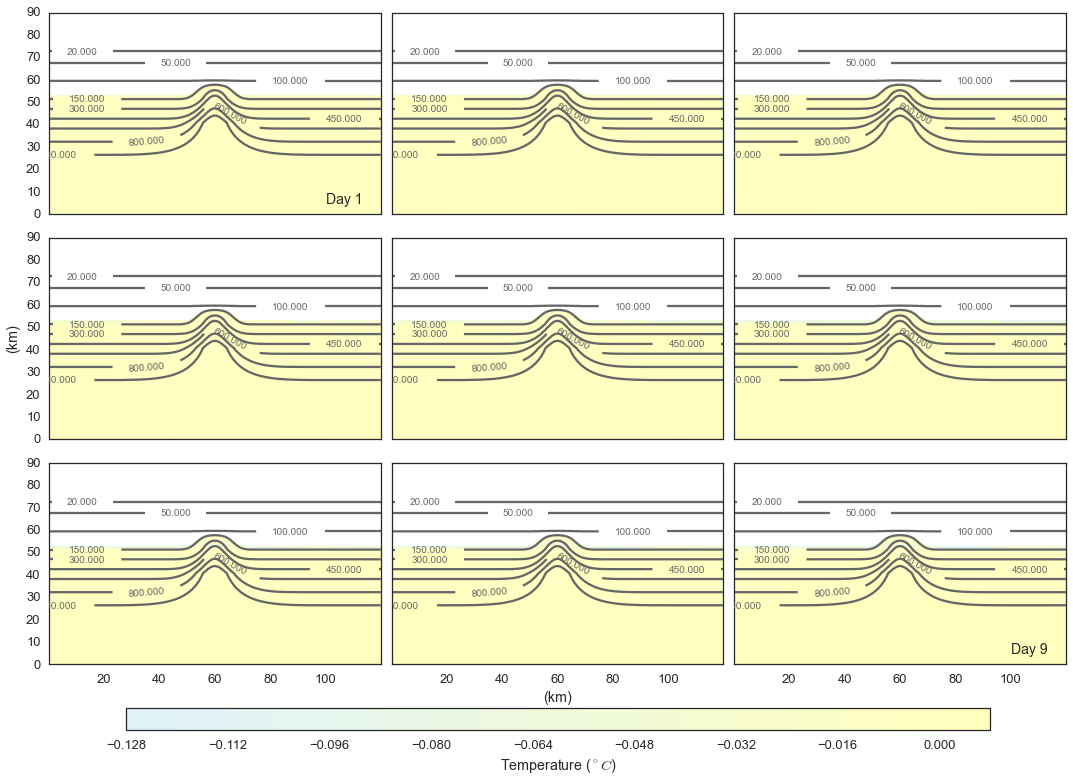

In [35]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked11[:,28,:,:],tmax=0.6,tmin=-0.6,colormap='RdYlBu_r')

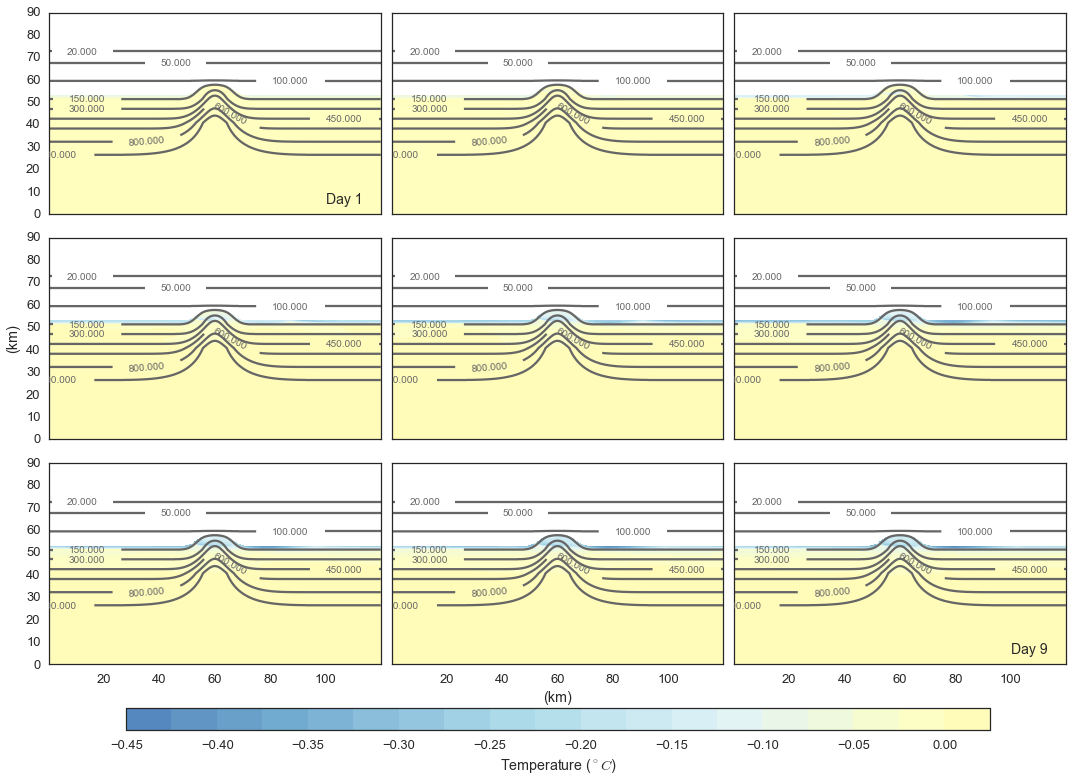

In [36]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked12[:,28,:,:],tmax=0.6,tmin=-0.6,colormap='RdYlBu_r')

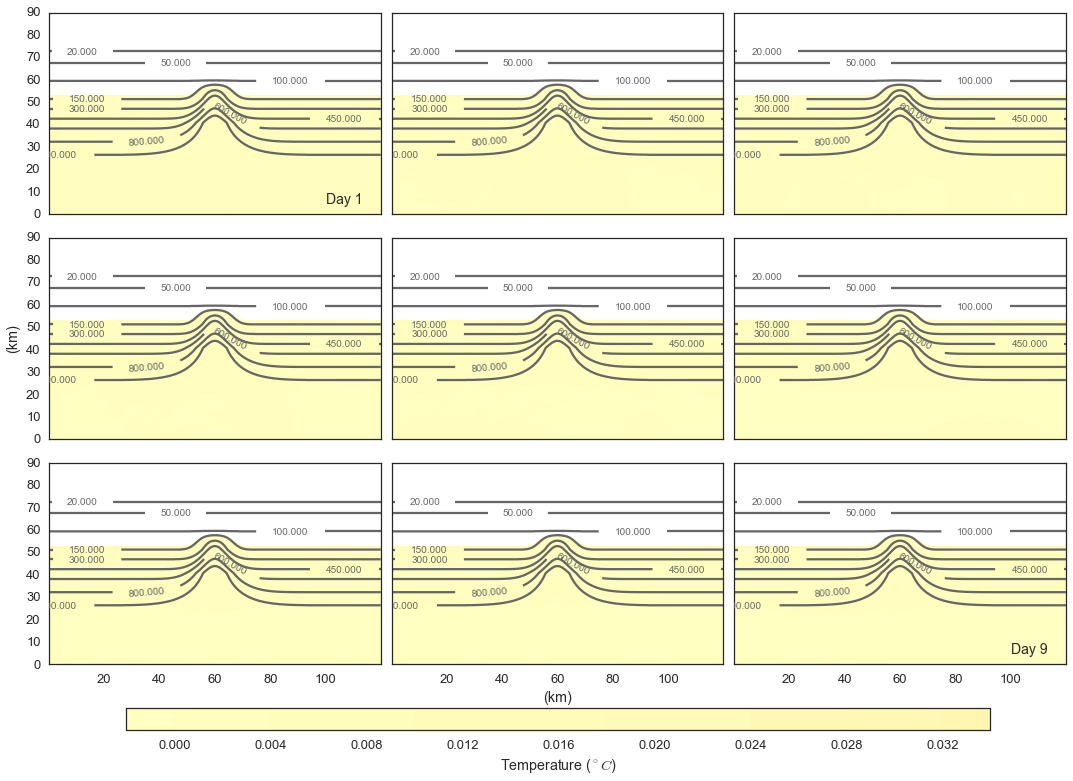

In [37]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked17[:,28,:,:],tmax=0.6,tmin=-0.6,colormap='RdYlBu_r')

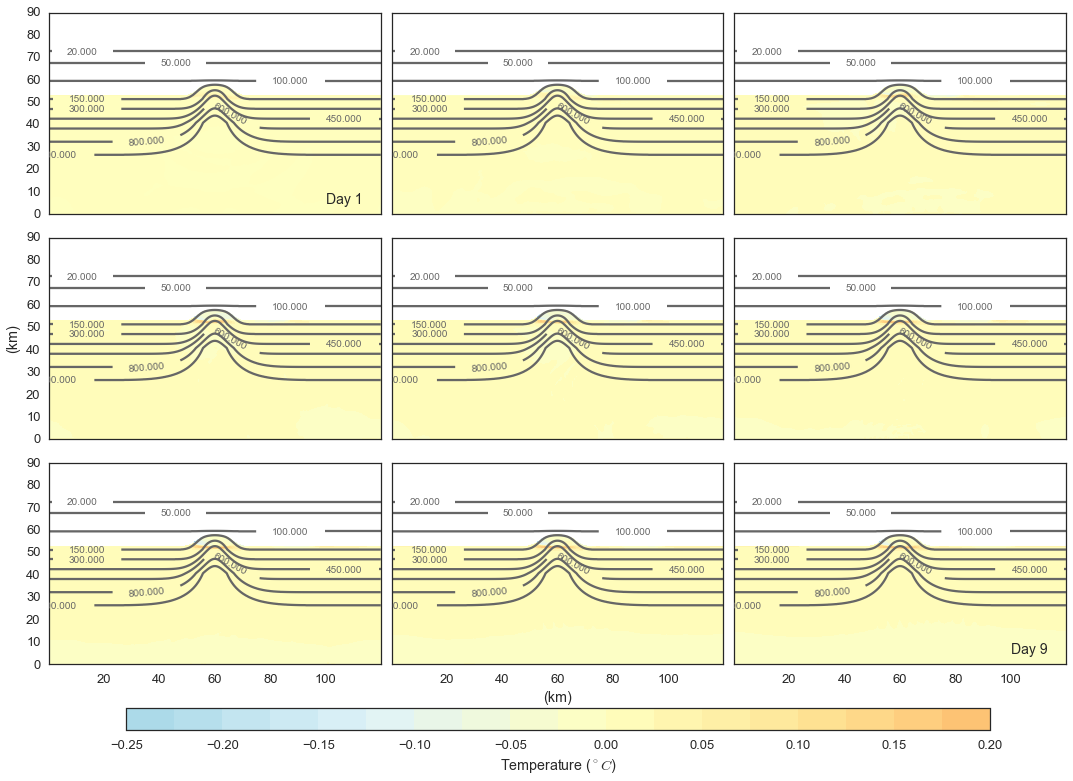

In [38]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked3D04[:,28,:,:],tmax=0.6,tmin=-0.6,colormap='RdYlBu_r')

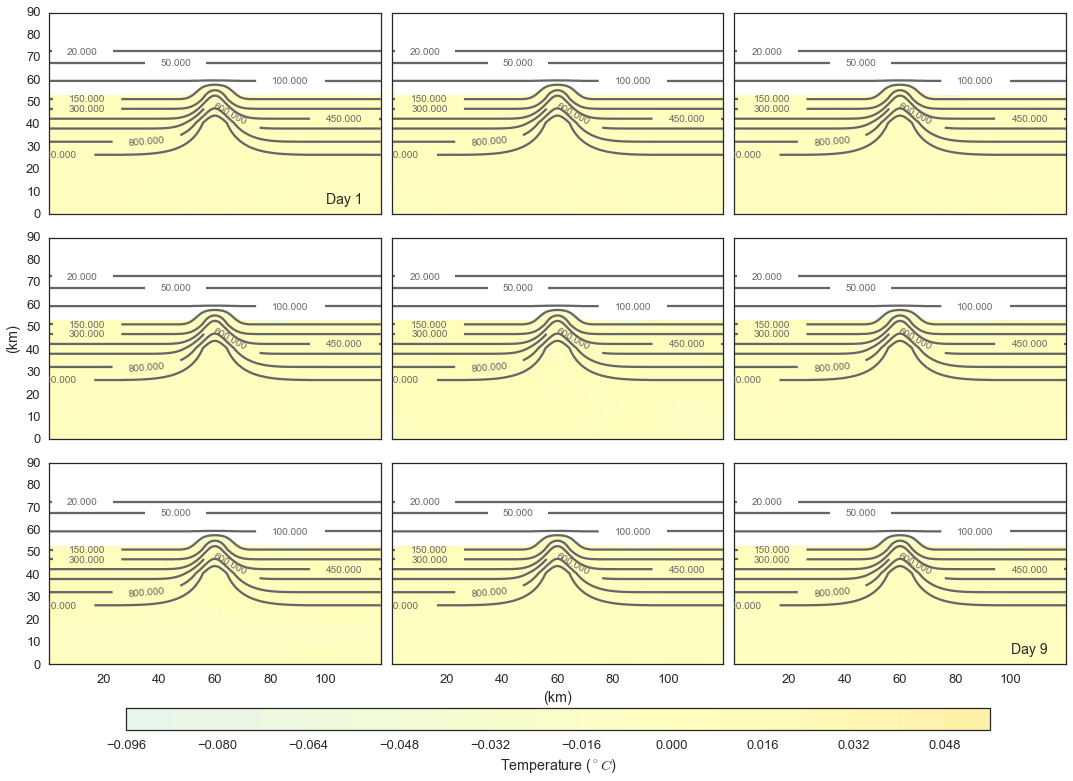

In [39]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked3D05[:,28,:,:],tmax=0.6,tmin=-0.6,colormap='RdYlBu_r')

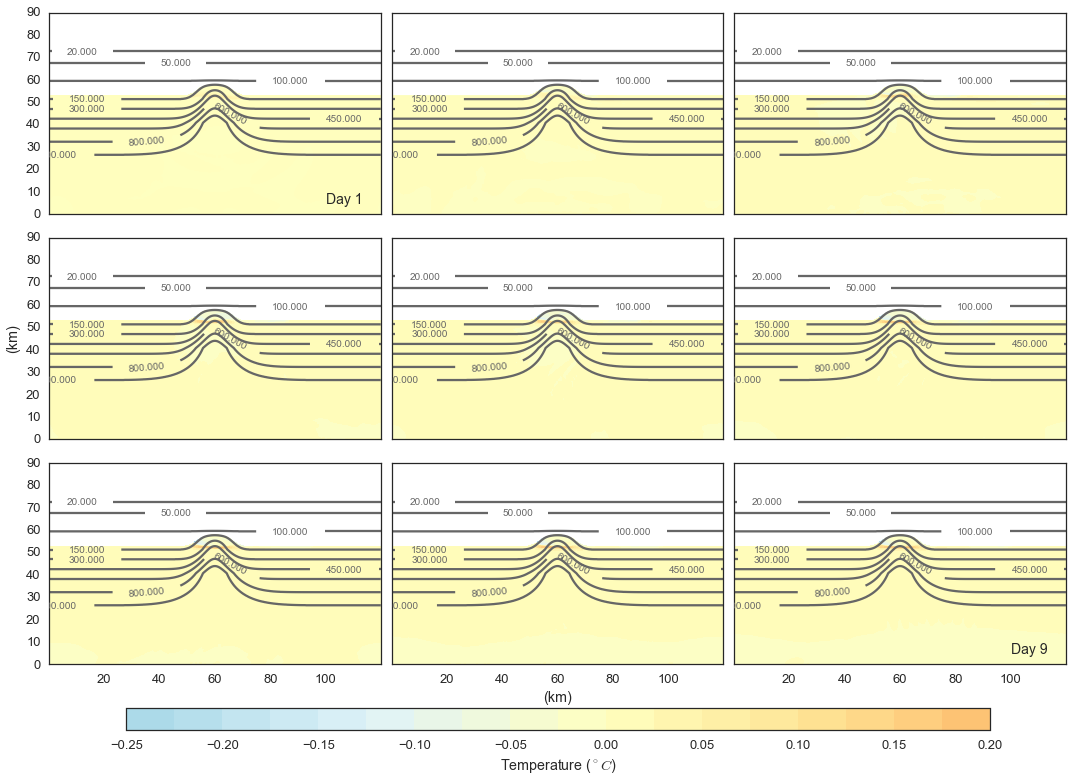

In [40]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked3D06[:,28,:,:],tmax=0.6,tmin=-0.6,colormap='RdYlBu_r')

## Upwelling differences - vertically integrated tracer along shelf

In [4]:
def HCW_Tracer_AlongShelf(Tr,MaskC,nzlim,rA,hFacC,drF,yin,zfin,xi,yi):
  '''
  INPUT----------------------------------------------------------------------------------------------------------------
    Tr    : Array with concentration values for a tracer. Until this function is more general, this should be size 19x90x360x360
    MaskC : Land mask for tracer
    nzlim : The nz index under which to look for water properties
    rA    : Area of cell faces at C points (360x360)
    fFacC : Fraction of open cell (90x360x360)
    drF   : Distance between cell faces (90)
    yin   : across-shore index of shelf break
    zfin  : shelf break index + 1 
    xi    : initial profile x index
    yi    : initial profile y index
    
    OUTPUT----------------------------------------------------------------------------------------------------------------
    VolWaterHighConc =  Array with the volume of water over the shelf [t,360] at every time output.
    Total_Tracer =  Array with the mass of tracer (m^3*[C]*l/m^3) at each x-position over the shelf [t,360] at 
                    every time output. 
                                                
  -----------------------------------------------------------------------------------------------------------------------
  '''
  maskExp = mpt.maskExpand(MaskC,Tr)

  TrMask=np.ma.array(Tr,mask=maskExp)   
    
  trlim = TrMask[0,nzlim,yi,xi]
    
  print('tracer limit concentration is: ',trlim)
    
    
  # mask cells with tracer concentration < trlim on shelf
  HighConc_Masked = np.ma.masked_less(TrMask[:,:zfin,yin:,:], trlim) 
  HighConc_Mask = HighConc_Masked.mask
    
  #Get volume of water of cells with relatively high concentration
  rA_exp = np.expand_dims(rA[yin:,:],0)
  drF_exp = np.expand_dims(np.expand_dims(drF[:zfin],1),1)
  rA_exp = rA_exp + np.zeros(hFacC[:zfin,yin:,:].shape)
  drF_exp = drF_exp + np.zeros(hFacC[:zfin,yin:,:].shape)
    
  ShelfVolume = hFacC[:zfin,yin:,:]*drF_exp*rA_exp
  ShelfVolume_exp = np.expand_dims(ShelfVolume,0)
  ShelfVolume_exp = ShelfVolume_exp + np.zeros(HighConc_Mask.shape)
    
  HighConc_CellVol = np.ma.masked_array(ShelfVolume_exp,mask = HighConc_Mask) 
  VolWaterHighConc =np.ma.sum(np.ma.sum(HighConc_CellVol,axis = 1),axis=1)
    
   #Get total mass of tracer on shelf
  Total_Tracer = np.ma.sum(np.ma.sum(ShelfVolume_exp*TrMask[:,:zfin,yin:,:]*1000.0,axis = 1),axis=1)
   # 1 m^3 = 1000 l
    
  return (VolWaterHighConc, Total_Tracer)

In [5]:
Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
Tr03 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/ptracersGlob.nc'
Tr11 = rdout.getField(Ptracers,'Tr2')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/ptracersGlob.nc'
Tr12 = rdout.getField(Ptracers,'Tr3')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/ptracersGlob.nc'
Tr17 = rdout.getField(Ptracers,'Tr3')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/ptracersGlob.nc'
Tr3D04 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/ptracersGlob.nc'
Tr3D05 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/ptracersGlob.nc'
Tr3D06= rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/ptracersGlob.nc'
Tr3D07= rdout.getField(Ptracers,'Tr1')


In [6]:
HCW03,TrMASS03 = HCW_Tracer_AlongShelf(Tr03,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW11,TrMASS11 = HCW_Tracer_AlongShelf(Tr11,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW12,TrMASS12 = HCW_Tracer_AlongShelf(Tr12,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW17,TrMASS17 = HCW_Tracer_AlongShelf(Tr17,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW3D04,TrMASS3D04 = HCW_Tracer_AlongShelf(Tr3D04,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW3D05,TrMASS3D05 = HCW_Tracer_AlongShelf(Tr3D05,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW3D06,TrMASS3D06 = HCW_Tracer_AlongShelf(Tr3D06,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW3D07,TrMASS3D07 = HCW_Tracer_AlongShelf(Tr3D07,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)

('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


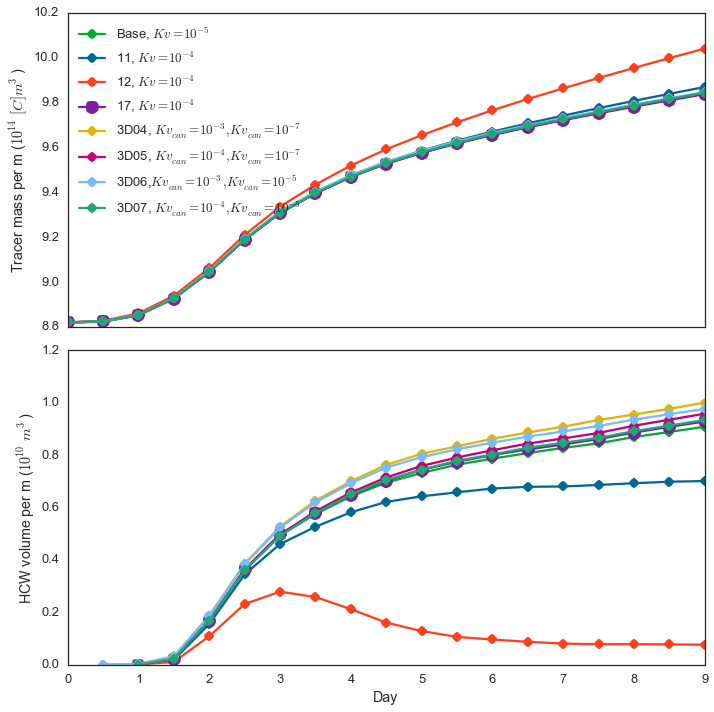

In [7]:
sns.set_context('talk')
sns.set_style('white')

fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMASS03,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],
         marker = 'o',label='Base, $Kv=10^{-5}$')
ax1.plot(tt/2.,np.sum(TrMASS11,axis=1)/1.E14,sns.xkcd_rgb["peacock blue"],
         marker = 'o',label='11, $Kv=10^{-4}$')
ax1.plot(tt/2.,np.sum(TrMASS12,axis=1)/1.E14,sns.xkcd_rgb["orange red"],
         marker = 'o',label = '12, $Kv=10^{-4}$')
ax1.plot(tt/2.,np.sum(TrMASS17,axis=1)/1.E14,sns.xkcd_rgb["purple"],
         marker = 'o',markersize=13,label='17, $Kv=10^{-4}$')
ax1.plot(tt/2.,np.sum(TrMASS3D04,axis=1)/1.E14,sns.xkcd_rgb["gold"],
         marker = 'o',label='3D04, $Kv_{can}=10^{-3},Kv_{can}=10^{-7} $')
ax1.plot(tt/2.,np.sum(TrMASS3D05,axis=1)/1.E14,sns.xkcd_rgb["magenta"],
         marker = 'o',label='3D05, $Kv_{can}=10^{-4},Kv_{can}=10^{-7} $')
ax1.plot(tt/2.,np.sum(TrMASS3D06,axis=1)/1.E14,sns.xkcd_rgb["sky blue"],
         marker = 'o',label='3D06,$Kv_{can}=10^{-3},Kv_{can}=10^{-5} $')
ax1.plot(tt/2.,np.sum(TrMASS3D07,axis=1)/1.E14,sns.xkcd_rgb["jade"],
         marker = 'o',label='3D07, $Kv_{can}=10^{-4},Kv_{can}=10^{-5} $')
   
ax2.plot(tt/2.,np.sum(HCW03,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base')
ax2.plot(tt/2.,np.sum(HCW11,axis=1)/1.E10,sns.xkcd_rgb["peacock blue"],marker = 'o',label='11')
ax2.plot(tt/2.,np.sum(HCW12,axis=1)/1.E10,sns.xkcd_rgb["orange red"],marker = 'o',label='12')
ax2.plot(tt/2.,np.sum(HCW17,axis=1)/1.E10,sns.xkcd_rgb["purple"],marker = 'o',markersize=13,label='17')
ax2.plot(tt/2.,np.sum(HCW3D04,axis=1)/1.E10,sns.xkcd_rgb["gold"],marker = 'o',label='3D04')
ax2.plot(tt/2.,np.sum(HCW3D05,axis=1)/1.E10,sns.xkcd_rgb["magenta"],marker = 'o',label='3D05')
ax2.plot(tt/2.,np.sum(HCW3D06,axis=1)/1.E10,sns.xkcd_rgb["sky blue"],marker = 'o',label='3D06')
ax2.plot(tt/2.,np.sum(HCW3D07,axis=1)/1.E10,sns.xkcd_rgb["jade"],marker = 'o',label='3D07')
 
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.tight_layout()

plt.show()